<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 4

## Introduction:

Example Code
Numpy shaping works like vector shaping, with the first dimension representing the number of rows, and the second dimension representing the number of columns.

See A [Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/)  for a nice guide to dimensions and other operations.



In [16]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.random((100,2))
print(data.shape)

(100, 2)


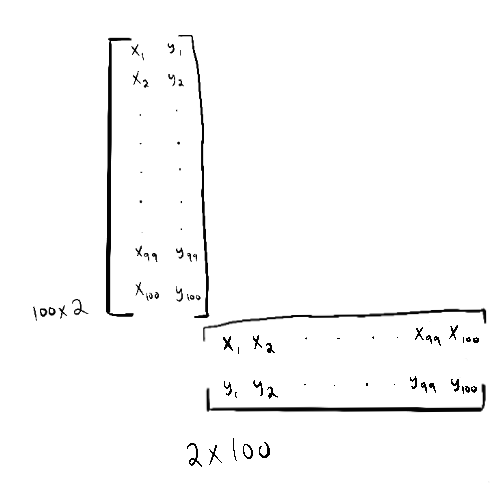

For the data we generated randomly, we can treat the first column as x values and the second column as y values in a scatter plot.

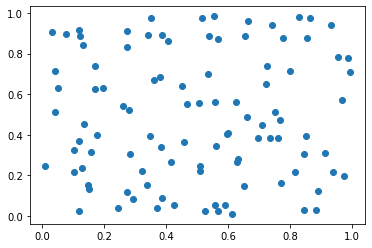

In [17]:
x = data[:,0] # slicing to get the first column of data
y = data[:,1]

plt.scatter(x,y)
plt.show()

Or we can reverse the order

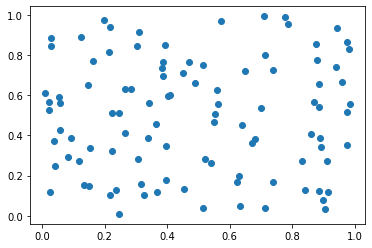

In [18]:
plt.scatter(y, x)
plt.show()

## Exercise 1: y=mx+b

### Exercise Question

Create a scatter plot of a single diagonal line from the top left corner to the bottom right corner. You can use numpy, but it can also be done without using numpy. If you have any questions about the syntax of matplotlib, visit the [docs](https://matplotlib.org/stable/tutorials/introductory/usage.html)

Hint: Use just the x values from the pre-lab examples



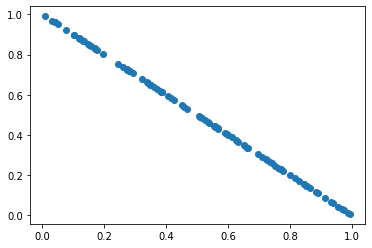

In [19]:
plt.scatter(x, 1 - x)
plt.show()


##Exercise 2: Flower Power

### Pre-Exercise Information

We can load various datasets using statsmodels. The available data sets are [here](https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv)

In [20]:
import statsmodels.api as sm
import pandas as pd
df = sm.datasets.get_rdataset('iris').data
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pandas has plotting functionality built on top of matplotlib which we can use to plot directly from the dataframe

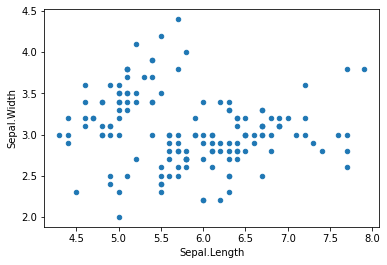

In [21]:
df.plot(x='Sepal.Length', y='Sepal.Width', kind='scatter')
plt.show()

In [22]:
import plotly.express as px
px.scatter(df, x='Sepal.Length', y='Sepal.Width', color='Species')

### Exercise Question

Find the best combination (subjective) of columns to display the separation between classes of flower.

In [23]:
px.scatter(df, x='Petal.Width', y='Petal.Length', color='Species')

Write a few sentences in the empty text cell below explaining your choice.

I chose petal width vs. petal length because this scatter plot shows a near complete separation between the species. Setosa flowers are grouped in the small (1-2 cm) petal length and small petal width (0-0.5cm). Versicolor are in a medium petal sized group (3-5 cm petal length and 1-1.75 cm petal width) while Virginica are in the largest petal sized group (4-7 cm petal length and 1.5-2.5 cm petal width).

## Exercise 3: What Goes In Must Come Out

### Pre-Exercise Information

Run this code to download the lady_potty.csv

In [24]:
!wget https://andrewnc.github.io/lady_potty.csv

--2022-09-28 02:42:37--  https://andrewnc.github.io/lady_potty.csv
Resolving andrewnc.github.io (andrewnc.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to andrewnc.github.io (andrewnc.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3255 (3.2K) [text/csv]
Saving to: ‘lady_potty.csv.1’

lady_potty.csv.1    100%[===================>]   3.18K  --.-KB/s    in 0s      

2022-09-28 02:42:37 (44.3 MB/s) - ‘lady_potty.csv.1’ saved [3255/3255]



Load lady_potty.csv into a pandas data frame.

This data comes from a friend’s cat named Lady. We recorded her bathroom trips over the course of a few weeks to see if there was a trend to her business.

It was mostly because she liked to go out multiple times per day, and we wanted to see if there was a better time for us to take her out.

All you have to do for this exercise is read in the data. And print out the data frame head using the following syntax:
```
myDataFrame.head()
```



### Exercise Question

In [25]:
with open ('./lady_potty.csv') as f:
  dataFrame = pd.read_csv(f)

dataFrame.head()

,ind,dt,dow,duration,pooped,peed
0,1,2020-05-23 18:55:00.0,sat,2,0,1
1,2,2020-05-23 20:30:00.0,sat,2,1,1
2,3,2020-05-23 21:25:00.0,sat,2,0,1
3,4,2020-05-24 09:38:00.0,sun,1,0,1
4,5,2020-05-24 11:01:00.0,sun,3,1,0


##Exercise 4: Litter Box

### Pre-Exercise Information

Often times in data science, you want to compare sets of data to one another. For example, you may want to compare how something changes over time.

One great way to compare these values is with a box plot. The box plot shows you how the data is distributed from the minimal values to the 75% range all the way to the maximal outlier values.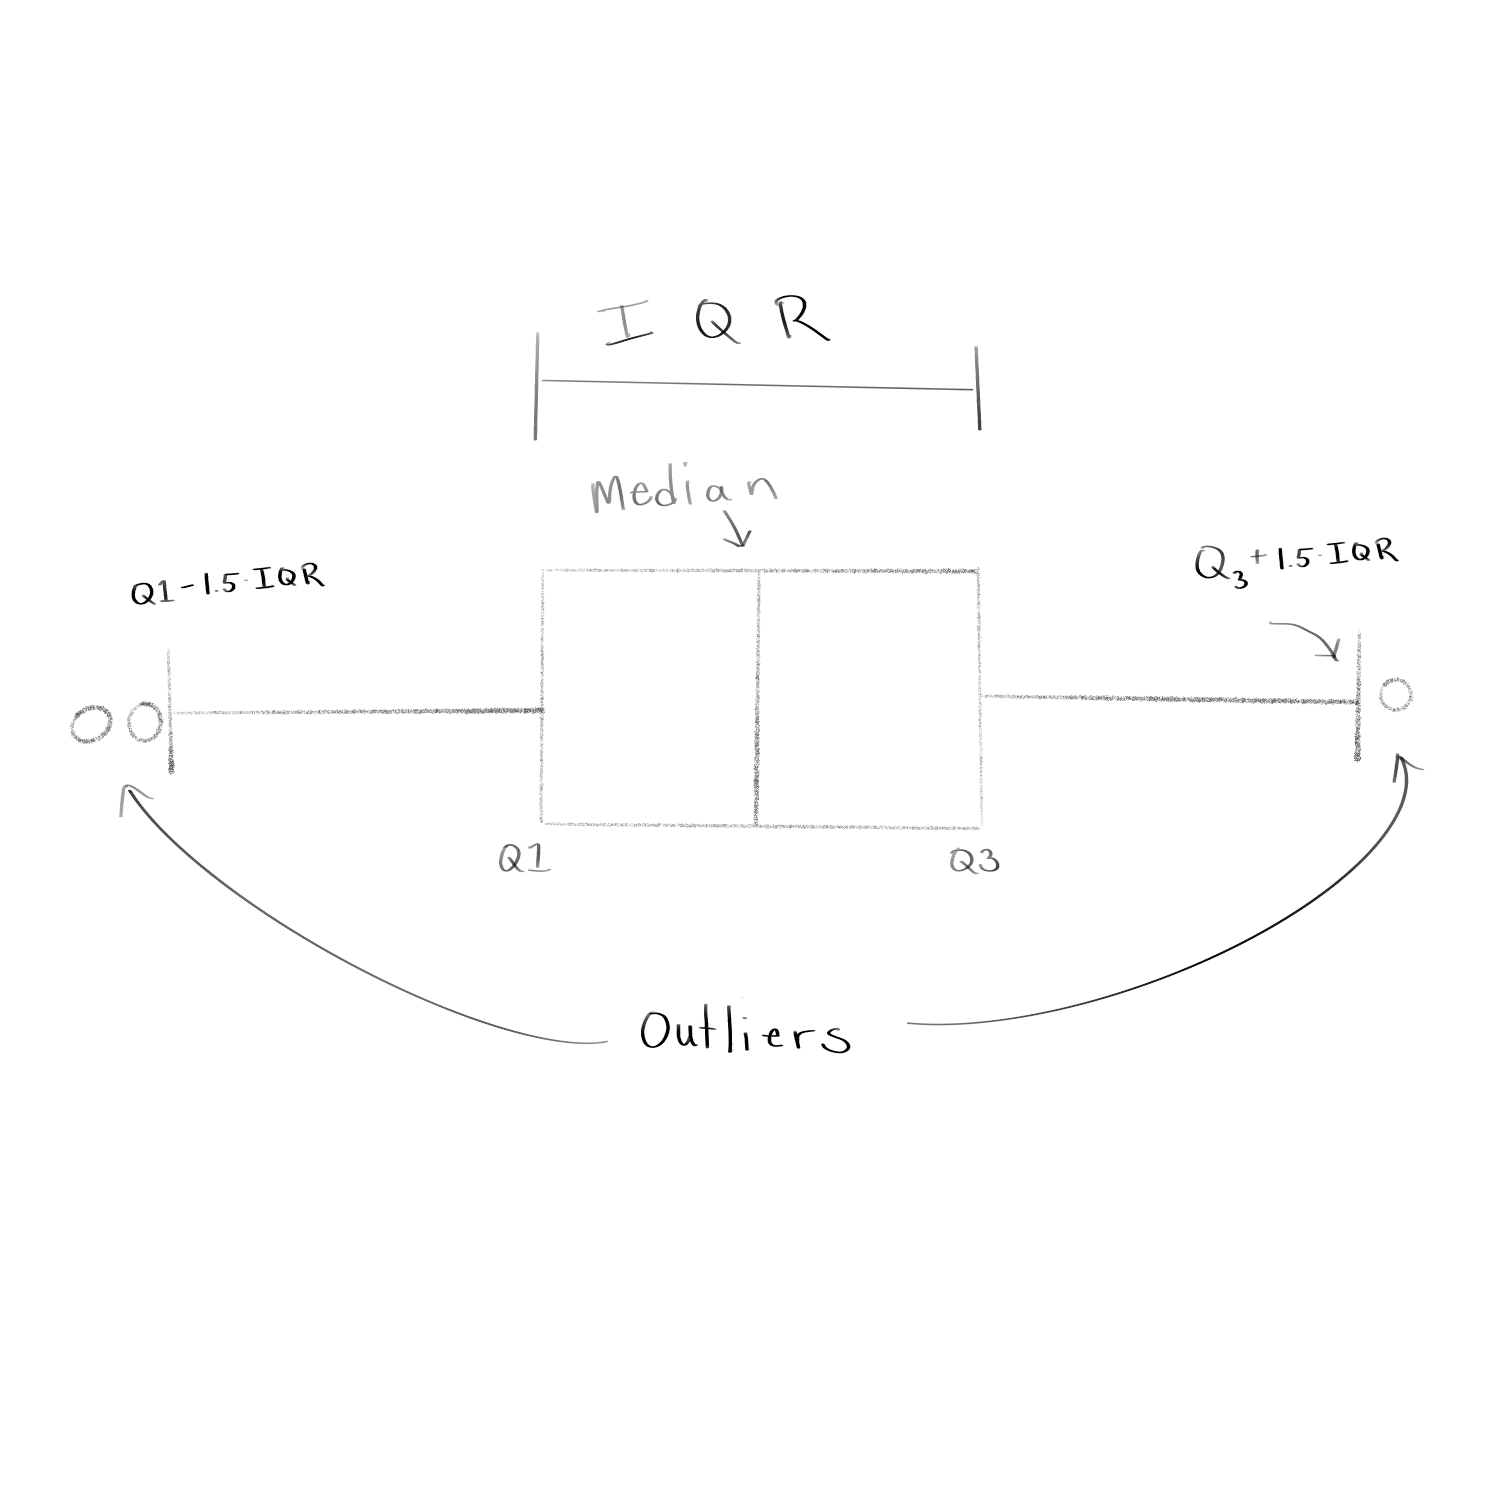

In [26]:
df = sm.datasets.get_rdataset('nhtemp').data
df.head()

,time,value
0,1912,49.9
1,1913,52.3
2,1914,49.4
3,1915,51.1
4,1916,49.4


Here we have the average yearly temperature from New Haven Connecticut from around 1910 - 1970.

A box plot is an excellent way to visualize this data over time. We first need to massage the data into a form with decades as a column. We do this by using the built in pandas cut function and choose 6 decades.

We then can generate a boxplot on a certain column.

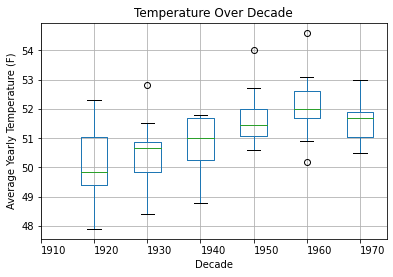

In [27]:
df['Decade'] = pd.cut(df.time, bins=6)
df[['Decade', 'value']].boxplot(by='Decade')
plt.xticks(range(7), [str(x) for x in range(1910, 1980, 10)])
plt.xticks(ha='left')
plt.suptitle('')
plt.title('Temperature Over Decade')
plt.xlabel('Decade')
plt.ylabel('Average Yearly Temperature (F)')
plt.show()

### Exercise Question

Create a box plot for 24 hour periods to visualize the trend of Lady's potty breaks.

Make sure the xticks, xlabel, ylabel, and title are all tidy and well labeled.

The y-axis should be bathroom break duration, and the x-axis should be the day of the month. The plot should have a box plot for every single day.

Hint: Much of the code can be used from the temperature box plot example above

In [28]:
#Here is some helpful starter code for the boxplot:

#Here is a function that will split the datetime values up into month-day:
def getDay(dt: str):
  value = dt.split(' ')
  values = value[0].split('-')
  return "{}-{}".format(values[1], values[2])

#And this is an example of how I would map the function to the dataframe, lambda functions are basically anonymous functions, and allow for you to pass in a function as a parameter:
dataFrame['dt'] = dataFrame['dt'].map(lambda x: getDay(x))

In [33]:
dataFrame

,ind,dt,dow,duration,pooped,peed
0,1,05-23,sat,2,0,1
1,2,05-23,sat,2,1,1
2,3,05-23,sat,2,0,1
3,4,05-24,sun,1,0,1
4,5,05-24,sun,3,1,0
...,...,...,...,...,...,...
84,85,06-01,mon,3,1,1
85,86,06-01,mon,1,0,1
86,87,06-01,mon,3,1,0
87,88,06-01,mon,1,0,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



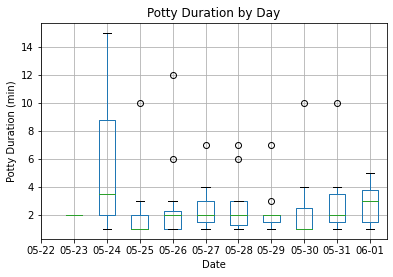

In [47]:
#Enter all of your plotting and data parsing code here, like the hint above says, much of the temperature box plot code can be reused here:
dataFrame[['dt', 'duration']].boxplot(by='dt')
dates = ['05-22']
dates.extend(dataFrame.dt.unique())
plt.xticks(range(11), dates)
plt.suptitle('')
plt.title('Potty Duration by Day')
plt.xlabel('Date')
plt.ylabel('Potty Duration (min)')
plt.show()

## Exercise 5: Oh Shoot!

Write what you observe from the boxplot data about my friend’s cat’s potty behavior in the empty cell below!

The cat usually takes less than 5 minutes to use the potty, though there are quite a few outlier potty breaks (usually one or two per day) that take noticably longer. 05-24 also is a notable day since the cat took much longer than usual to use the potty--the median and the upper bound for that day were both the highest out of any of the other days. There doesn't seem to be any trends in the date--the potty breaks don't get longer or shorter as the week progresses for the 